In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:, 3:5].values

In [6]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

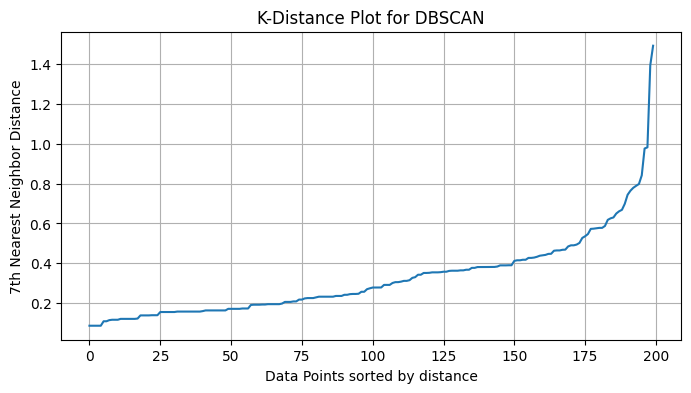

In [8]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Fit Nearest Neighbors
neighbors = NearestNeighbors(n_neighbors=7)  # 7 = min_samples
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Step 2: Sort distances of the 10th nearest neighbor
k_distances = np.sort(distances[:, 6])  # 6 because index starts at 0

# Step 3: Plot
plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.xlabel("Data Points sorted by distance")
plt.ylabel("7th Nearest Neighbor Distance")
plt.title("K-Distance Plot for DBSCAN")
plt.grid(True)
plt.show()

In [38]:
from sklearn.cluster import DBSCAN
DBSCAN_C = DBSCAN(eps=0.4, min_samples=6)
y_DBSCAN=DBSCAN_C.fit_predict(X_scaled)


In [39]:
y_DBSCAN

array([ 0,  0,  1,  0,  0,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0, -1,  0,  0,  1,  0,  1, -1,
        1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,  2,  3, -1,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2, -1,  2,  3,  2, -1,  2,  3,
       -1,  3,  2,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [40]:
supervised=dataset

In [41]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,-1
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [42]:
supervised['Cluster_group']=y_DBSCAN

In [43]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [44]:
supervised['Cluster_group'].value_counts()

Cluster_group
 0    112
 2     32
 3     26
-1     19
 1     11
Name: count, dtype: int64

In [45]:
supervised.to_csv("cluster.csv",index=False)

In [46]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, y_DBSCAN)
print("Silhouette Score:", score)

Silhouette Score: 0.40346443499452717


In [47]:
supervised.columns[3]

'Annual Income (k$)'

In [48]:
supervised.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_group'],
      dtype='object')

C:\Anaconda3.12.v\envs\aiml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


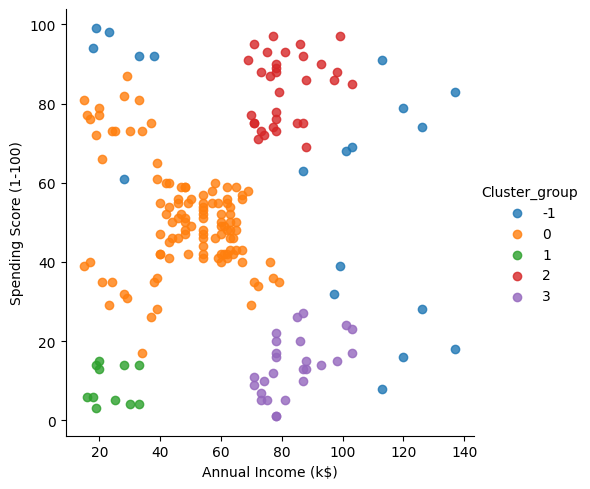

In [49]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)